In [55]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import sys
from importlib import reload
from pathlib import Path
import scanpy as sc
from pylab import rcParams

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import scvelo as scv
scv.logging.print_version()


scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.set_figure_params('scvelo')  # for beautified visualization

%matplotlib inline

Running scvelo 0.2.2 (python 3.8.3) on 2020-09-17 21:26.


In [4]:
###----- Get dir & load / reload packages
try:
    code_dir
except NameError:
    print("Start")
    code_dir = os.getcwd()
    base_dir = code_dir.replace("/plotting_codes","")
    tools_dir = base_dir + "/tools"

    sys.path.insert(1, tools_dir)
    import sc_addons
    import sc_pl_addons
else:
    print("Reload")
    reload(sc_addons)
    reload(sc_pl_addons)

Reload


In [22]:
## ----- Setup working dir
sp_name = "0_Acute-Chronic"
#analysis_name = ["4", "LouvainCluster"] ### Analysis name here

wk_dir = base_dir + "/9_Figures/%s"%sp_name
Path(wk_dir).mkdir(parents=True, exist_ok=True)
os.chdir(wk_dir)

print(sp_name)

0_Acute-Chronic


In [56]:
###----- old - new cluster names
order_file ='%s/%s/2_scVelo'%(base_dir, sp_name) + '/%s_scVelo_out_%s/pt_ordered_cluster_avg.csv'%(analysis_name_all[0], analysis_name_all[1])
order_df = pd.read_csv(order_file)
old_names = order_df['louvain'].tolist()
new_names = order_df['louvain_new_label'].tolist()

# 1. Scatterplots

In [57]:
###----- Analysis name here
analysis_name_all = ["0", "resampled"] 

adata_all_h5ad = '%s/%s/1_Scanpy'%(base_dir, sp_name) + '/%s_Scanpy_out_%s/%s_paga.h5ad'%(analysis_name_all[0], analysis_name_all[1], sp_name)
adata_all = sc.read_h5ad(adata_all_h5ad)

adata_all.obs['louvain_old'] = adata_all.obs['louvain']
adata_all.obs['louvain'] = [ new_names[old_names.index(int(x))] for x in adata_all.obs['louvain_old'] ]

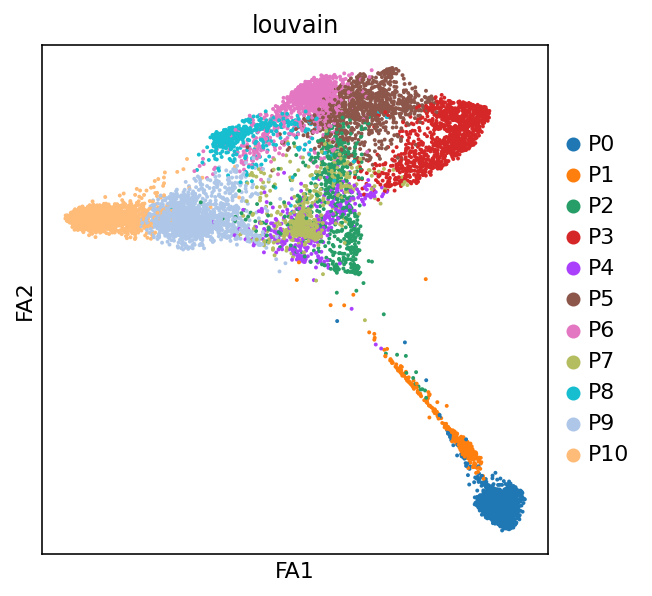

In [63]:
rcParams['figure.figsize'] = 4.5, 4.5
sc.pl.draw_graph(adata_all, color=['louvain'], save='%s-%s_paga_louvain'%(analysis_name_all[0], analysis_name_all[1]))